## How much does the minimum document frequency or "sparsity" influence document similarity? 

This notebook does the following using the ten chapters plus appendix of Frederick Douglass's _Narrative of the Life of Frederick Douglass_ (1845):
    - compares similarity scores using different minimum document frequency (df) values
    - compare cosine similarity scores with the Euclidean distance metric
    - uses MDS to show (dis)similarity between chapters
    - visualizes the matrix
    - clusters together using Seaborn
    - calcuates variance between selected chapters and displays top fifty most variant terms

<b>Revisions</b>:
<pre>
12/05/2018: <a href="http://www.dartmouth.edu/~jed">James E. Dobson</a> (james.e.dobson@dartmouth.edu): Created initial notebook.
12/06/2018: Added Cosine Similarity Comparison
</pre>

In [1]:
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

from operator import itemgetter
import nltk
import pandas

import seaborn as sn
sn.set(style="white")
%matplotlib inline

In [2]:
texts=["Douglass/01",
       "Douglass/02",
       "Douglass/03",
       "Douglass/04",
       "Douglass/05",
       "Douglass/06",
       "Douglass/07",
       "Douglass/08", 
       "Douglass/09", 
       "Douglass/10", 
       "Douglass/11"]

In [3]:
similarity_chart=list()

# check minimum for minimum document frequencies from 1-13
for df_factor in range(1,12):
    vectorizer = CountVectorizer(input='filename', stop_words='english',
                             strip_accents='unicode',lowercase=True,
                             min_df=df_factor)
    dtm_matrix = vectorizer.fit_transform(texts).toarray()
    
    # tell us about the model
    documents, vocabulary = dtm_matrix.shape
    print("DF: {0} Documents: {1} Vocabulary: {2}".format(df_factor,documents,vocabulary))

    # calculate distances between texts
    dist_matrix = euclidean_distances(dtm_matrix)
    
    row = [df_factor]
    
    #display distance from the first text
    for x,y in sorted(enumerate(np.round(dist_matrix[0],3)), key=itemgetter(1)):
        b,d,c = texts[x].partition('/')
        v = '{0} ({1:.1f})'.format(c,y)
        row.append(v)
    similarity_chart.append(row)    

DF: 1 Documents: 11 Vocabulary: 3996
DF: 2 Documents: 11 Vocabulary: 1527
DF: 3 Documents: 11 Vocabulary: 805
DF: 4 Documents: 11 Vocabulary: 463
DF: 5 Documents: 11 Vocabulary: 287
DF: 6 Documents: 11 Vocabulary: 183
DF: 7 Documents: 11 Vocabulary: 114
DF: 8 Documents: 11 Vocabulary: 68
DF: 9 Documents: 11 Vocabulary: 38
DF: 10 Documents: 11 Vocabulary: 20
DF: 11 Documents: 11 Vocabulary: 9


In [4]:
pandas.DataFrame(similarity_chart)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,01 (0.0),06 (44.7),08 (48.0),05 (48.2),09 (49.2),03 (50.6),02 (53.2),04 (53.6),07 (55.2),11 (90.6),10 (194.7)
1,2,01 (0.0),06 (40.9),08 (43.1),05 (44.4),09 (44.6),03 (46.4),04 (47.0),02 (49.0),07 (49.2),11 (82.5),10 (185.5)
2,3,01 (0.0),06 (38.7),08 (39.7),09 (41.6),05 (41.9),03 (44.0),04 (44.3),02 (44.5),07 (45.9),11 (76.1),10 (168.4)
3,4,01 (0.0),06 (35.5),08 (36.4),09 (38.8),05 (39.4),04 (41.0),02 (41.0),03 (41.7),07 (41.7),11 (72.1),10 (162.0)
4,5,01 (0.0),06 (31.6),08 (33.2),09 (35.8),05 (36.0),07 (37.4),02 (37.5),03 (38.2),04 (38.8),11 (63.2),10 (153.4)
5,6,01 (0.0),06 (28.2),08 (29.9),09 (32.8),07 (32.9),05 (33.0),02 (34.4),03 (35.9),04 (36.8),11 (60.4),10 (146.5)
6,7,01 (0.0),06 (24.9),08 (27.4),07 (29.9),05 (30.4),09 (30.5),02 (32.0),03 (34.2),04 (34.7),11 (54.2),10 (137.1)
7,8,01 (0.0),06 (20.2),03 (22.9),08 (23.1),07 (25.1),09 (26.5),02 (27.2),05 (27.8),04 (30.0),11 (48.2),10 (128.7)
8,9,01 (0.0),06 (15.9),08 (17.8),07 (19.0),05 (19.8),03 (20.3),02 (23.5),09 (23.9),04 (27.3),11 (31.7),10 (119.4)
9,10,01 (0.0),06 (14.0),07 (14.6),08 (14.7),05 (15.1),03 (17.7),02 (19.0),09 (19.5),04 (26.1),11 (29.1),10 (110.8)


##  Results Using Euclidean Distance

In [5]:
# recalculate with no minimum df
df_factor=1
vectorizer = CountVectorizer(input='filename',stop_words='english',
                             strip_accents='unicode',lowercase=True,
                             min_df=df_factor)
dtm_matrix = vectorizer.fit_transform(texts).toarray()
    
# tell us about the model
documents, vocabulary = dtm_matrix.shape
print("DF: {0} Documents: {1} Vocabulary: {2}".format(df_factor,documents,vocabulary))

# calculate distances between texts
dist_matrix = euclidean_distances(dtm_matrix)

DF: 1 Documents: 11 Vocabulary: 3996


In [6]:
#display distance from the first text
for x,y in sorted(enumerate(np.round(dist_matrix[0],5)), key=itemgetter(1)):
    print('{0} ({1})'.format(texts[x],y))

Douglass/01 (0.0)
Douglass/06 (44.71018)
Douglass/08 (48.02083)
Douglass/05 (48.19751)
Douglass/09 (49.15282)
Douglass/03 (50.5569)
Douglass/02 (53.20714)
Douglass/04 (53.57238)
Douglass/07 (55.22681)
Douglass/11 (90.60353)
Douglass/10 (194.71774)


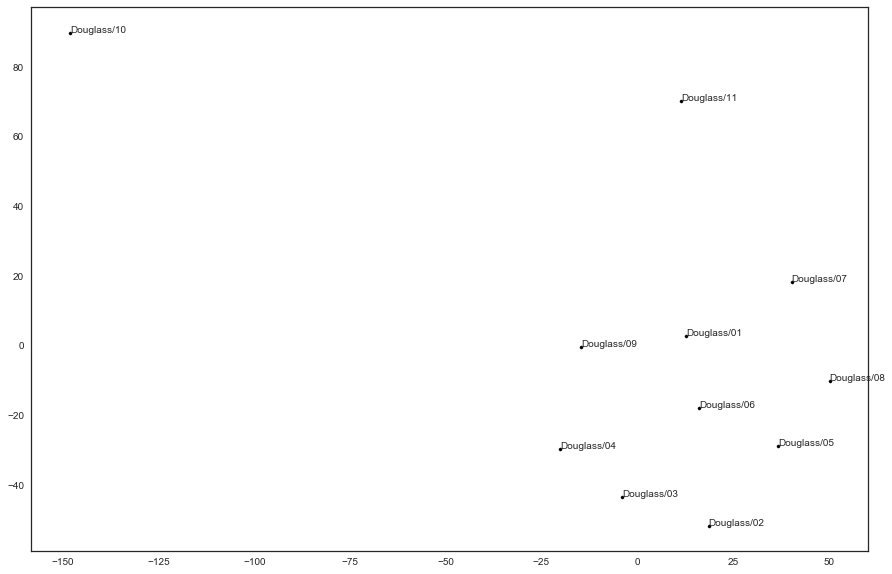

In [7]:
# reduce using MDS and allow MDS to calculate Euclidean distances
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="euclidean", random_state=1)
pos = mds.fit_transform(dtm_matrix)

# plot!
import matplotlib.pyplot as plt
xs, ys = pos[:, 0], pos[:, 1]
fig = plt.figure(figsize=(15, 10),)

for x, y, text in zip(xs, ys, texts):
    plt.scatter(x, y, c='black',s=10)
    plt.text(x, y, text)
plt.show()

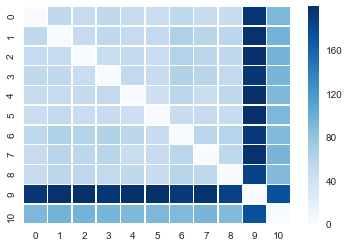

In [8]:
# display the similarity matrix (white=similar, dark blue=different)
sn.heatmap(dist_matrix, cmap='Blues',linewidths=.5)

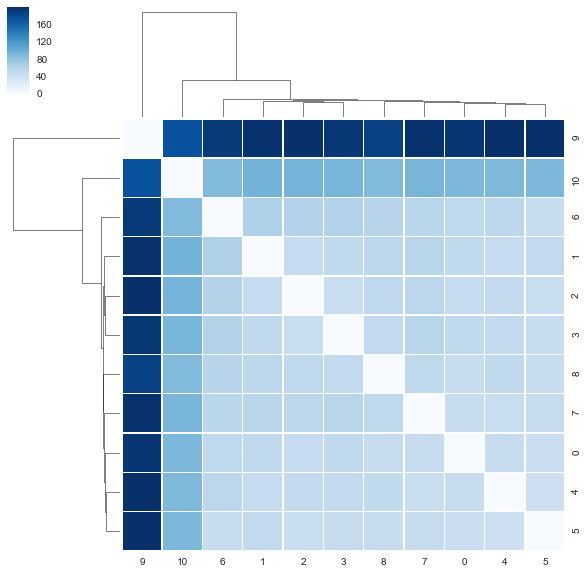

In [9]:
# cluster the chapters together
sn.clustermap(dist_matrix,cmap='Blues',fmt='g',linewidths=.5)

##  Results Using Cosine Similarity

In [10]:
# recalcuate distance matrix using cosine (dis)similarity
dist_matrix = 1 - cosine_similarity(dtm_matrix)

#display distance from the first text
for x,y in sorted(enumerate(np.round(dist_matrix[0],5)), key=itemgetter(1)):
    print('{0} ({1})'.format(texts[x],y))

Douglass/01 (0.0)
Douglass/09 (0.50372)
Douglass/08 (0.52118)
Douglass/10 (0.54317)
Douglass/02 (0.58984)
Douglass/07 (0.62011)
Douglass/11 (0.62676)
Douglass/03 (0.62862)
Douglass/06 (0.62962)
Douglass/05 (0.65433)
Douglass/04 (0.6901)


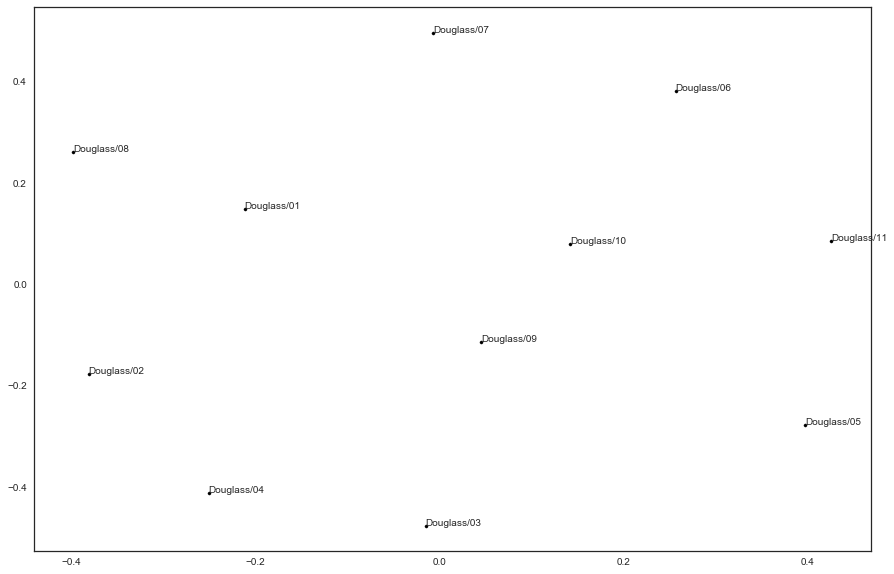

In [11]:
# reduce using MDS 
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
pos = mds.fit_transform(dist_matrix)

# plot!
import matplotlib.pyplot as plt
xs, ys = pos[:, 0], pos[:, 1]
fig = plt.figure(figsize=(15, 10),)

for x, y, text in zip(xs, ys, texts):
    plt.scatter(x, y, c='black',s=10)
    plt.text(x, y, text)
plt.show()

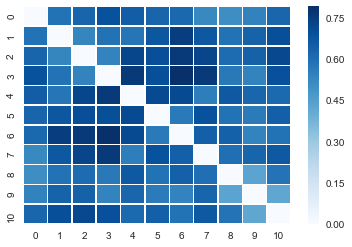

In [12]:
# display the similarity matrix (white=similar, dark blue=different)
sn.heatmap(dist_matrix, cmap='Blues',linewidths=.5)

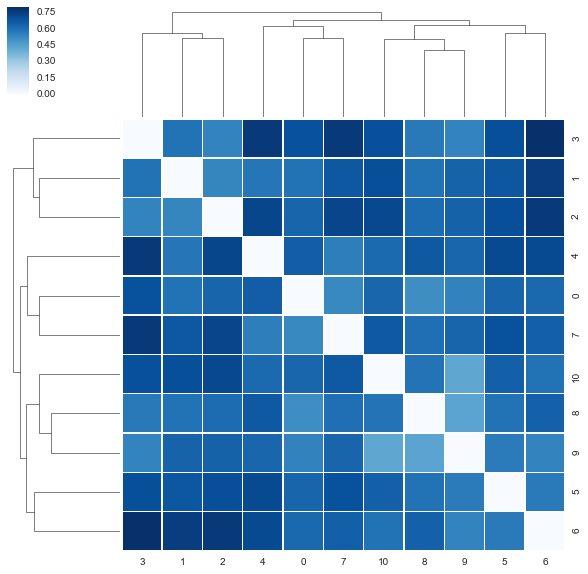

In [13]:
# cluster the chapters together
sn.clustermap(dist_matrix,cmap='Blues',fmt='g',linewidths=.5)